Import Module

In [ ]:
!pip install nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from transformers import GPT2Tokenizer, GPT2Model
import torch
import numpy as np
import matplotlib.pyplot as plt
import nltk

Initialize tokenizer and model

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2Model.from_pretrained("gpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Tokenization and Embeddings extraction from poem

In [ ]:
def get_feature_vector(poem):
    inputs = tokenizer(poem, return_tensors="pt", max_length=1024, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

Loading Poems from Dataset

In [ ]:
def load_poems_from_folder(folder_path):
    poems = []
    for filename in os.listdir(folder_path):
        with open(os.path.join(folder_path, filename), "r", encoding="utf-8") as file:
            poem = file.read()
            poems.append(poem)
    return poems

Mean and Standard Deviation (Returns a dictionary with key-value dictionary pairs returned from a function)

In [ ]:
def calculate_class_stats(poems, class_labels):
    class_vectors = {label: [] for label in class_labels}
    for poem, label in zip(poems, class_labels):
        feature_vector = get_feature_vector(poem)
        class_vectors[label].append(feature_vector)

    class_stats = {}
    for label, vectors in class_vectors.items():
        mean_vector = np.mean(vectors, axis=0)
        std_vector = np.std(vectors, axis=0)
        class_stats[label] = {"mean": mean_vector, "std": std_vector}

    return class_stats

Calculating Euclidean Distance between two centroids

In [ ]:
# Function to calculate Euclidean distance between two centroids
def calculate_distance(centroid1, centroid2):
    return np.linalg.norm(centroid1 - centroid2)

Analyzing First feature (Histogram/ Mean and Variance)

In [ ]:
def analyze_first_feature(poems):
    first_feature_values = []
    for poem in poems:
        feature_vector = get_feature_vector(poem)
        first_feature_value = feature_vector[0]  # Extracting the first feature
        first_feature_values.append(first_feature_value)
    # Plot histogram
    plt.hist(first_feature_values, bins=10, color='blue', alpha=0.7)
    plt.xlabel('First Feature Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of First Feature')
    plt.show()
    # Calculate mean and variance
    mean_value = np.mean(first_feature_values)
    variance_value = np.var(first_feature_values)

    print("Mean:", mean_value)
    print("Variance:", variance_value)

Mean vector for acrostic: [ 1.05093814e-01  5.23843104e-03 -5.90555012e-01 -9.84218158e-03
  1.58198729e-01 -2.08799794e-01  4.37147665e+00  2.21177906e-01
 -1.71063803e-02 -2.37840228e-02  1.23667806e-01 -6.66070729e-02
 -1.36186019e-01  1.01430200e-01 -6.90601533e-03 -5.08326143e-02
  2.12207884e-02 -8.69900286e-02  2.22139761e-01 -7.55578000e-03
 -1.39569761e-02 -4.58102338e-02  1.01730470e-02  1.03152014e-01
 -5.60706742e-02  2.69901097e-01 -3.23288918e-01  1.22941507e-03
 -1.34572282e-01  6.95360545e-03 -2.31005307e-02 -1.17423914e-01
  1.74116954e-01  6.43111719e-03  1.43568385e-02 -9.69897863e-03
  6.01434555e+01 -2.14546989e-03  2.42718887e-02  1.53880477e-01
 -2.01405913e-01 -9.67931524e-02 -9.36531276e-02  3.82163227e-02
 -7.97869191e-02  7.80730695e-02 -3.25961076e-02  4.83645685e-03
 -6.05760291e-02  2.60612249e-01 -1.13539018e-01  4.94856648e-02
  1.84326991e-02 -1.62963524e-01 -2.52137296e-02  7.14775562e-01
  1.56714290e-01 -2.97940914e-02  2.18891472e-01  1.80008471e-01

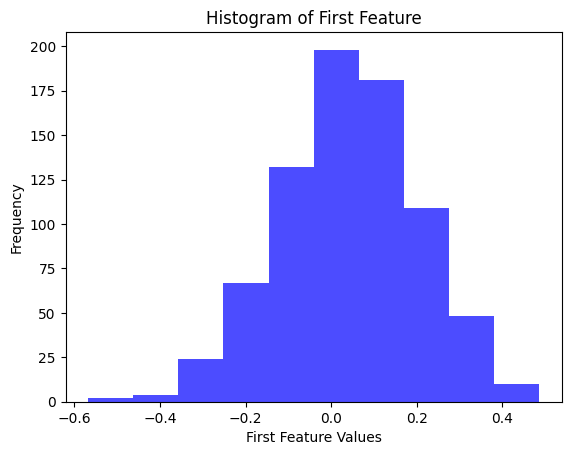

Mean: 0.0405682
Variance: 0.026048781


In [ ]:
 # Example usage

dataset_folder = r"/content/drive/MyDrive/Datasets/My Dataset"
class_labels = ["acrostic", "ballad", "epigram", "haiku", "limerick", "sestina", "sonnet", "villanelle"]

class_stats = {}
for label in class_labels:
    folder_path = os.path.join(dataset_folder, label)
    poems = load_poems_from_folder(folder_path)
    if poems is not None:
        class_stats[label] = calculate_class_stats(poems, [label] * len(poems))

# Calculate distance between mean vectors of classes
class_distances = {}
for i, label1 in enumerate(class_labels):
    for label2 in class_labels[i+1:]:
        distance = calculate_distance(class_stats[label1][label1]["mean"], class_stats[label2][label2]["mean"])
        class_distances[(label1, label2)] = distance

print("Mean vector for acrostic:", class_stats["acrostic"]['acrostic']["mean"])
print("Standard deviation vector for acrostic:", class_stats["acrostic"]['acrostic']["std"])
print("Mean vector for ballad:", class_stats["ballad"]["ballad"]["mean"])
print("Standard deviation vector for ballad:", class_stats["ballad"]["ballad"]["std"])
print("Distance between mean vectors of acrostic and ballad:", class_distances[("acrostic", "ballad")])
print(np.sqrt(np.sum(np.square( class_stats["acrostic"]['acrostic']["std"]))))
print(np.sqrt(np.sum(np.square( class_stats["ballad"]['ballad']["std"]))))

# Analyze the first feature for the entire dataset
all_poems = []
for label in class_labels:
    folder_path = os.path.join(dataset_folder, label)
    poems = load_poems_from_folder(folder_path)
    if poems is not None:
        all_poems.extend(poems)

print("\nAnalysis of the first feature for the entire dataset:")
analyze_first_feature(all_poems)

A3. Minkwoski Distance and Plotting

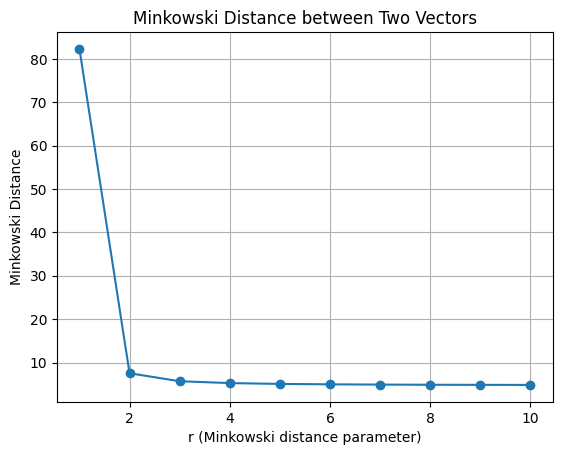

In [ ]:
# Take the feature vectors of the first two poems
poems = []
for label in class_labels:
    folder_path = os.path.join(dataset_folder, label)
    poems += load_poems_from_folder(folder_path)[:2]  # Get the first two poems from each class

vector1 = get_feature_vector(poems[0])  # Feature vector of the first poem
vector2 = get_feature_vector(poems[1])  # Feature vector of the second poem

# Function to calculate Minkowski distance between two vectors with a given r
def minkowski_distance(vector1, vector2, r):
    return np.linalg.norm(vector1 - vector2, ord=r)

# Calculate and plot Minkowski distance for two vectors with varying values of r
r_values = np.arange(1, 11)
distances = [minkowski_distance(vector1, vector2, r) for r in r_values]

plt.plot(r_values, distances, marker='o', linestyle='-')
plt.xlabel('r (Minkowski distance parameter)')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between Two Vectors')
plt.grid(True)
plt.show()

A4. Dividing data as Testing and Training dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Select the two classes for splitting
selected_classes = ["acrostic", "ballad"]

# Combine feature vectors and labels for the selected classes
X_selected = []
y_selected = []
for label in selected_classes:
    folder_path = os.path.join(dataset_folder, label)
    poems = load_poems_from_folder(folder_path)
    if poems is not None:
        X_selected.extend([get_feature_vector(poem) for poem in poems])
        y_selected.extend([label] * len(poems))

# Convert lists to numpy arrays
X_selected = np.array(X_selected)
y_selected = np.array(y_selected)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.3, random_state=42)


KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training set
neigh.fit(X_train_selected, y_train_selected)

KNeighborsClassifier(n_neighbors=3)

Test the Accuracy

In [ ]:
# Test the accuracy of the kNN classifier using the test set
accuracy = neigh.score(X_test_selected, y_test_selected)

print("Accuracy of kNN classifier:", accuracy)


Accuracy of kNN classifier: 0.8


Prediction Behavior of Test Vectors

In [ ]:
# Use the predict function to make predictions on the test set
predictions = neigh.predict(X_test_selected)

# Print the predictions
print("Predictions:", predictions)

Predictions: ['acrostic' 'acrostic' 'acrostic' 'ballad' 'ballad' 'acrostic' 'acrostic'
 'ballad' 'ballad' 'ballad' 'acrostic' 'ballad' 'ballad' 'acrostic'
 'ballad' 'ballad' 'ballad' 'ballad' 'acrostic' 'acrostic' 'acrostic'
 'ballad' 'ballad' 'acrostic' 'acrostic' 'acrostic' 'acrostic' 'acrostic'
 'ballad' 'ballad' 'acrostic' 'ballad' 'ballad' 'acrostic' 'ballad'
 'ballad' 'ballad' 'ballad' 'ballad' 'acrostic' 'acrostic' 'ballad'
 'acrostic' 'ballad' 'ballad' 'ballad' 'acrostic' 'acrostic' 'ballad'
 'ballad' 'ballad' 'ballad' 'acrostic' 'ballad' 'acrostic' 'acrostic'
 'ballad' 'ballad' 'ballad' 'ballad']


## KNN Classifier with Different K's

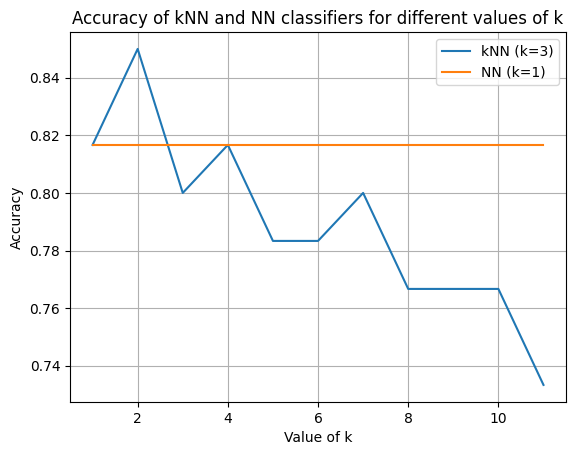

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Initialize lists to store accuracies for kNN and NN classifiers
accuracies_knn = []
accuracies_nn = []

# Vary k from 1 to 11
for k in range(1, 12):
    # Initialize kNN classifier with current k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Train the kNN classifier
    knn_classifier.fit(X_train_selected, y_train_selected)
    # Test accuracy of kNN classifier
    knn_accuracy = accuracy_score(y_test_selected, knn_classifier.predict(X_test_selected))
    # Store accuracy for kNN classifier
    accuracies_knn.append(knn_accuracy)

    # Initialize NN classifier with k=1
    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    # Train the NN classifier
    nn_classifier.fit(X_train_selected, y_train_selected)
    # Test accuracy of NN classifier
    nn_accuracy = accuracy_score(y_test_selected, nn_classifier.predict(X_test_selected))
    # Store accuracy for NN classifier
    accuracies_nn.append(nn_accuracy)

# Plot accuracy for both classifiers
plt.plot(range(1, 12), accuracies_knn, label='kNN (k=3)')
plt.plot(range(1, 12), accuracies_nn, label='NN (k=1)')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN and NN classifiers for different values of k')
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix to determine Fit of the Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on training data
y_train_pred_knn = knn_classifier.predict(X_train_selected)
y_train_pred_nn = nn_classifier.predict(X_train_selected)

# Confusion matrix and classification report for training data
print("Confusion Matrix and Classification Report for kNN (k=3) on Training Data:")
print(confusion_matrix(y_train_selected, y_train_pred_knn))
print(classification_report(y_train_selected, y_train_pred_knn))

print("Confusion Matrix and Classification Report for NN (k=1) on Training Data:")
print(confusion_matrix(y_train_selected, y_train_pred_nn))
print(classification_report(y_train_selected, y_train_pred_nn))

# Predictions on test data
y_test_pred_knn = knn_classifier.predict(X_test_selected)
y_test_pred_nn = nn_classifier.predict(X_test_selected)

# Confusion matrix and classification report for test data
print("Confusion Matrix and Classification Report for kNN (k=3) on Test Data:")
print(confusion_matrix(y_test_selected, y_test_pred_knn))
print(classification_report(y_test_selected, y_test_pred_knn))

print("Confusion Matrix and Classification Report for NN (k=1) on Test Data:")
print(confusion_matrix(y_test_selected, y_test_pred_nn))
print(classification_report(y_test_selected, y_test_pred_nn))

Confusion Matrix and Classification Report for kNN (k=3) on Training Data:
[[55 14]
 [ 1 70]]
              precision    recall  f1-score   support

    acrostic       0.98      0.80      0.88        69
      ballad       0.83      0.99      0.90        71

    accuracy                           0.89       140
   macro avg       0.91      0.89      0.89       140
weighted avg       0.91      0.89      0.89       140

Confusion Matrix and Classification Report for NN (k=1) on Training Data:
[[69  0]
 [ 0 71]]
              precision    recall  f1-score   support

    acrostic       1.00      1.00      1.00        69
      ballad       1.00      1.00      1.00        71

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Confusion Matrix and Classification Report for kNN (k=3) on Test Data:
[[17 14]
 [ 2 27]]
              precision    recall  f1-score   support

    acrostic  

Applying PCA

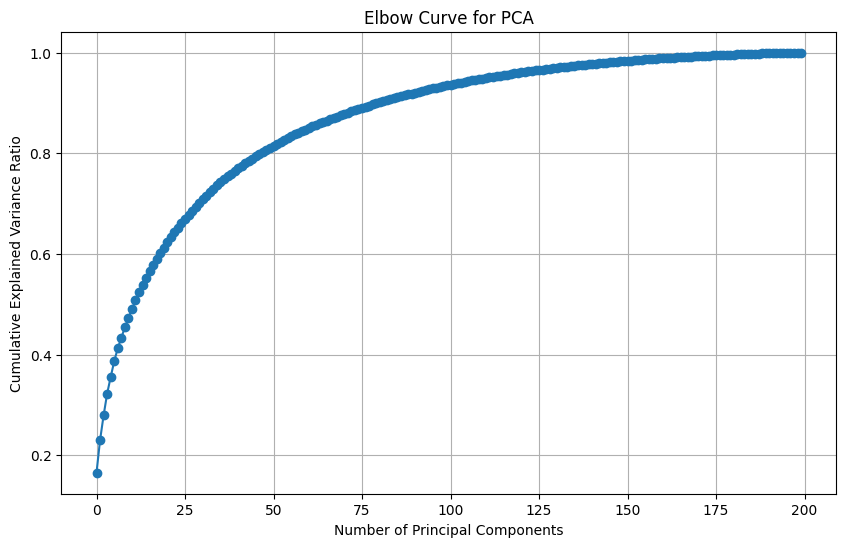

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Elbow Curve for PCA')
plt.grid(True)
plt.show()
